In [81]:
import numpy as np
import matplotlib.pyplot as plt


In [82]:
np.random.seed(42)

# Parametry
num_sequences = 30
sequence_length = 20

# Generowanie danych
X = np.random.uniform(0, 1, (num_sequences, sequence_length))
X = np.round(X * 2) / 2  # Zaokrąglenie do 0, 0.5, 1

# Cele wyjściowe: liczba wystąpień 0.5 w każdej sekwencji
t = np.sum(X == 0.5, axis=1, keepdims=True)


In [83]:
# Inicjalizacja wag
hidden_size = 1
W_in = np.random.randn(1)  # wag wejścia
W_rec = np.random.randn(1)  # wag rekurencyjna
b = np.zeros(1)

# Funkcja forward
def rnn_forward(X_seq):
    h = 0.0
    for x in X_seq:
        h = x * W_in + h * W_rec + b
    return h


In [84]:
# Obliczenie predykcji dla wszystkich sekwencji
y_pred = np.array([rnn_forward(seq) for seq in X])

# Błąd MSE
loss = np.mean((y_pred - t.squeeze())**2)
print(f"MSE loss: {loss:.4f}")


MSE loss: 93.4777


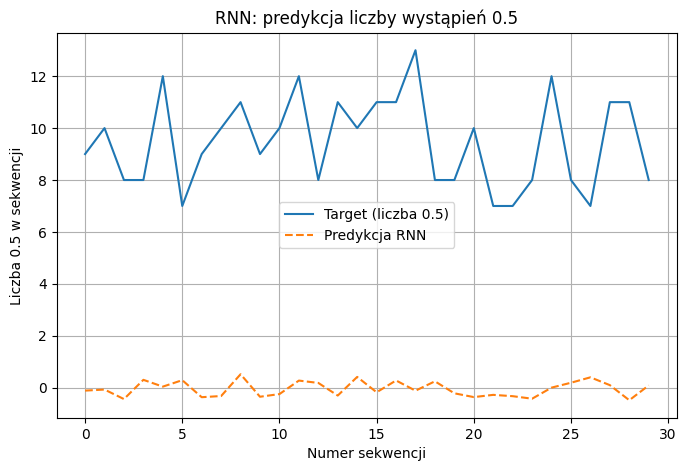

In [85]:
plt.figure(figsize=(8, 5))
plt.plot(t, label="Target (liczba 0.5)")
plt.plot(y_pred, label="Predykcja RNN", linestyle='dashed')
plt.xlabel("Numer sekwencji")
plt.ylabel("Liczba 0.5 w sekwencji")
plt.title("RNN: predykcja liczby wystąpień 0.5")
plt.legend()
plt.grid(True)
plt.show()
